# **The Spark Foundation**
## Data Science & Business Analytics Intern

# **Task 6 - Predection Using Decision Tree Algorithms**

## **Submitted By :- Maneesh**

DataSet :- https://bit.ly/3kXTdox

### Import Library

In [134]:
import pandas as pd

# Numerical Computation
import numpy as np

# For visulation 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [135]:
import warnings
warnings.filterwarnings('ignore')

### Loading the DataSet

In [136]:
# Loading the iris dataset
df = pd.read_csv('Iris.csv')

In [137]:
## Rename the Columns
df.drop('Id', axis = 1, inplace=True)
iris = df.rename(columns = {'SepalLengthCm' : 'sepal_length', 'SepalWidthCm' : 'sepal_width', 'PetalLengthCm' : 'petal_length', 'PetalWidthCm' : 'petal_width', 'Species':'species'})

In [138]:
## Same as head(). But it take random example
iris.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
46,5.1,3.8,1.6,0.2,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
52,6.9,3.1,4.9,1.5,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
83,6.0,2.7,5.1,1.6,Iris-versicolor
135,7.7,3.0,6.1,2.3,Iris-virginica
90,5.5,2.6,4.4,1.2,Iris-versicolor
125,7.2,3.2,6.0,1.8,Iris-virginica


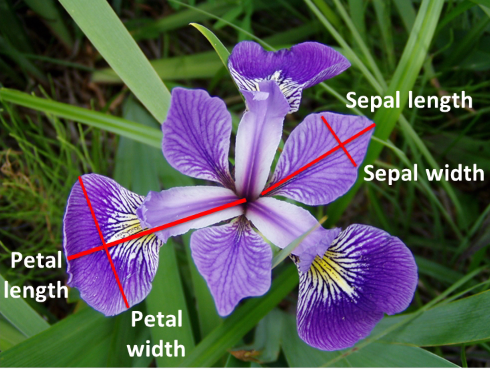

In [139]:
# how many example of each class has
iris['species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

##### Shape of DataSet

In [140]:
iris.shape

(150, 5)

In [141]:
# Columns in DataSet
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [142]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [143]:
## Check the Null Values in each Feature(columns)
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [144]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


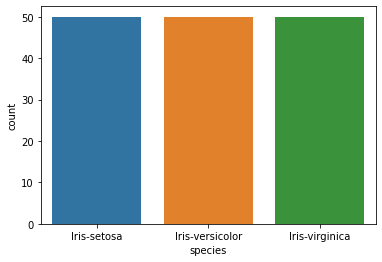

In [145]:
# univariate analysis
sns.countplot('species', data = iris)

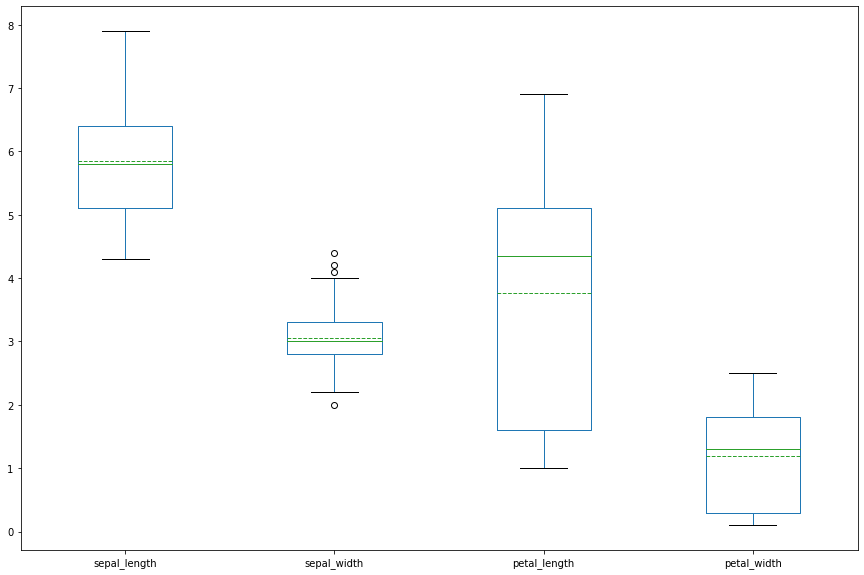

In [146]:

iris.plot(kind = 'box', figsize = (15,10), showmeans = True, meanline = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0bd7dc88>,
      dtype=object)

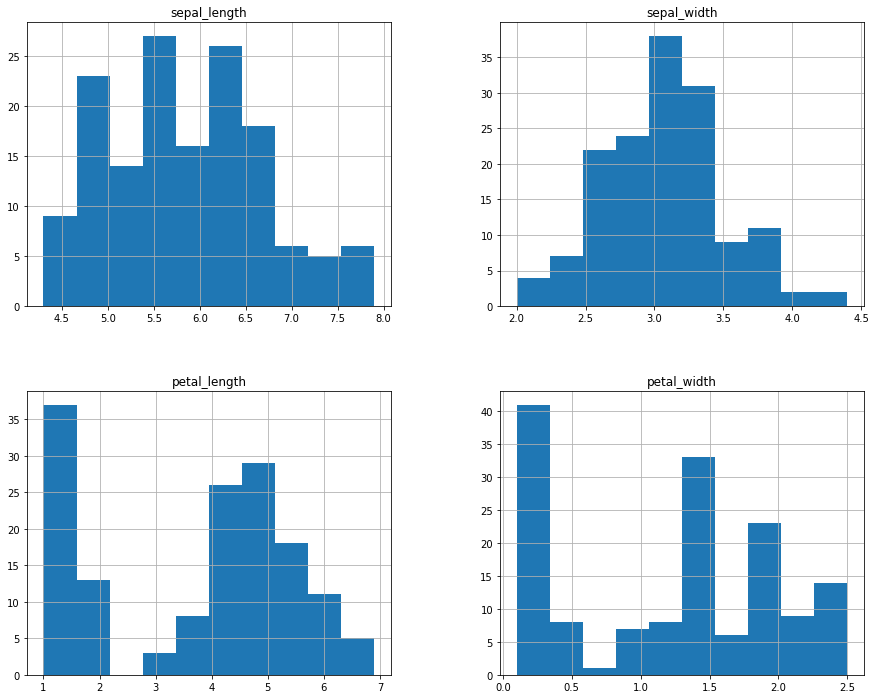

In [147]:
iris.hist( figsize = (15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac0bb5fcc0>,
      dtype=object)

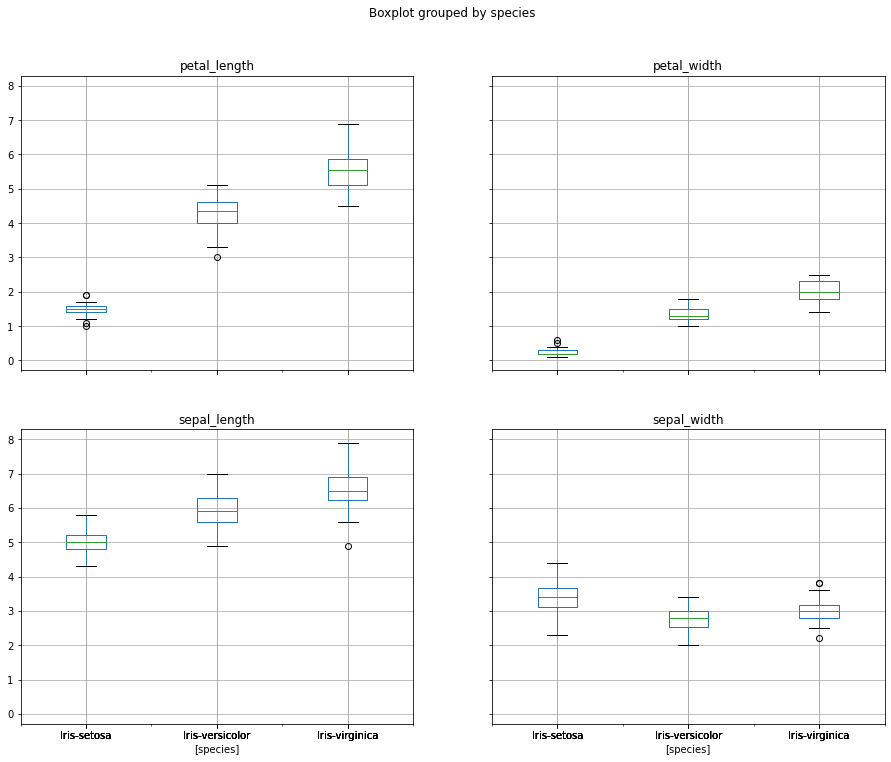

In [148]:
# box plot grouped by species 
iris.boxplot(by = 'species', figsize = (15,12))

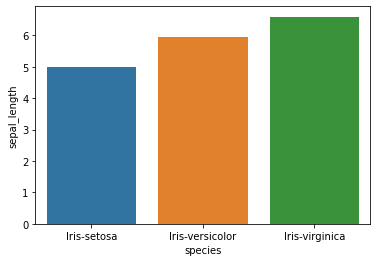

In [149]:
# bivariate analysis
sns.barplot(x= 'species', y= 'sepal_length', data = iris, ci = False)

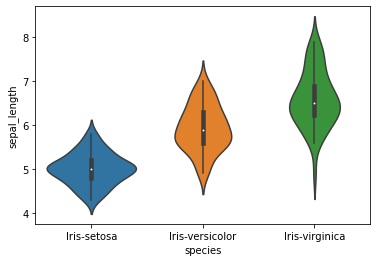

In [150]:
sns.violinplot(x= 'species', y= 'sepal_length', data = iris)

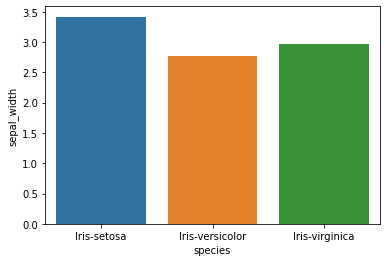

In [151]:
sns.barplot(x= 'species', y= 'sepal_width', data = iris, ci = False)

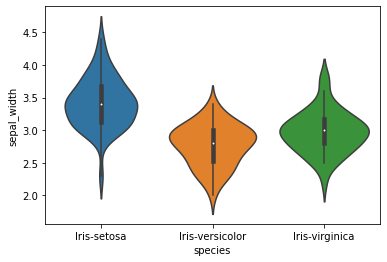

In [152]:
sns.violinplot(x= 'species', y= 'sepal_width', data = iris)

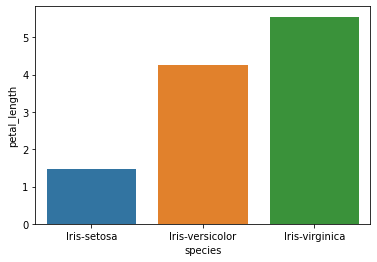

In [153]:
sns.barplot(x= 'species', y= 'petal_length', data = iris, ci = False)

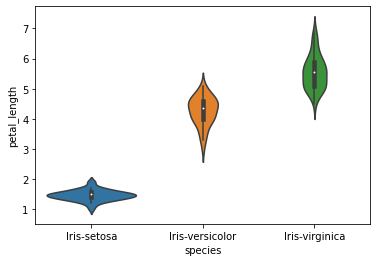

In [154]:
sns.violinplot(x= 'species', y= 'petal_length', data = iris)

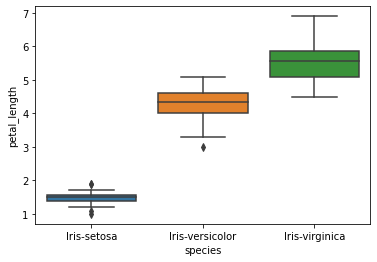

In [155]:
sns.boxplot(x= 'species', y= 'petal_length', data = iris)

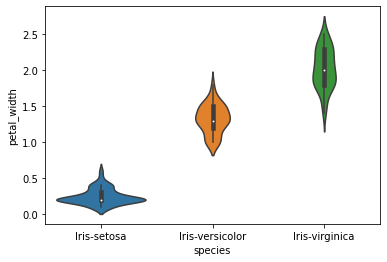

In [156]:
sns.violinplot(x= 'species', y= 'petal_width', data = iris)

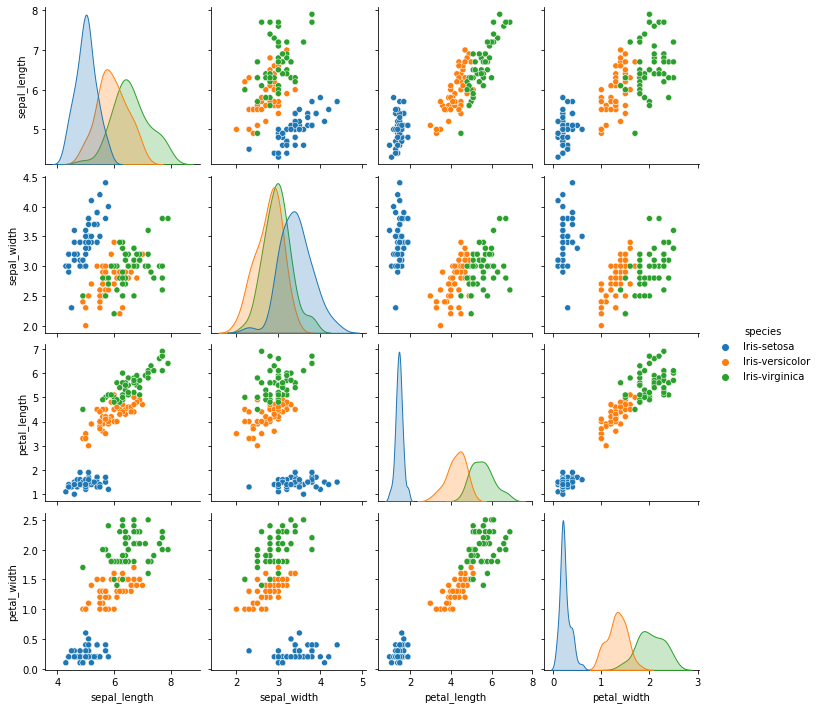

In [157]:
sns.pairplot(iris, hue = 'species')

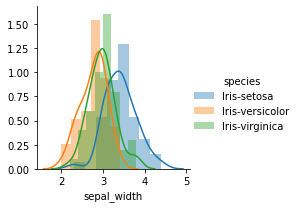

In [158]:
sns.FacetGrid(data = iris,hue = 'species', size = 3).map(sns.distplot, 'sepal_width').add_legend()

In [159]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


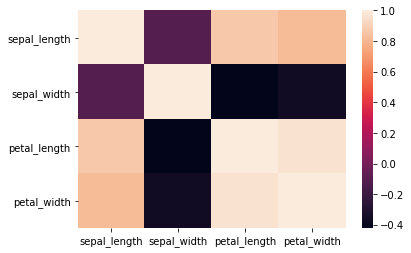

In [160]:
sns.heatmap(iris.corr())

In [161]:
# Adding some extra feature
iris['sl_sw'] = iris['sepal_length'] * iris['sepal_width']
iris['sl_pw'] = iris['sepal_length'] * iris['petal_width']
iris['sl_pl'] = iris['sepal_length'] * iris['petal_length']
iris['sw_pl'] = iris['sepal_width'] * iris['petal_length']
iris['sw_pw'] = iris['sepal_width'] * iris['petal_width']
iris['pl_pw'] = iris['petal_length'] * iris['petal_width']

In [162]:
cmat = iris.corr('pearson')
cmat

,sepal_length,sepal_width,petal_length,petal_width,sl_sw,sl_pw,sl_pl,sw_pl,sw_pw,pl_pw
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.683362,0.884525,0.934410,0.901252,0.831218,0.857326
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,0.645421,-0.288511,-0.326299,-0.179218,-0.190521,-0.280612
petal_length,0.871754,-0.420516,1.000000,0.962757,0.366584,0.963510,0.983123,0.961261,0.929327,0.958472
petal_width,0.817954,-0.356544,0.962757,1.000000,0.375365,0.986299,0.937126,0.942928,0.979548,0.980229
sl_sw,0.683362,0.645421,0.366584,0.375365,1.000000,0.474617,0.481754,0.573776,0.513710,0.459484
sl_pw,0.884525,-0.288511,0.963510,0.986299,0.474617,1.000000,0.967399,0.964212,0.980483,0.992853
sl_pl,0.934410,-0.326299,0.983123,0.937126,0.481754,0.967399,1.000000,0.970389,0.921926,0.960132
sw_pl,0.901252,-0.179218,0.961261,0.942928,0.573776,0.964212,0.970389,1.000000,0.964858,0.960071
sw_pw,0.831218,-0.190521,0.929327,0.979548,0.513710,0.980483,0.921926,0.964858,1.000000,0.974657
pl_pw,0.857326,-0.280612,0.958472,0.980229,0.459484,0.992853,0.960132,0.960071,0.974657,1.000000


In [163]:
# taking those variable which has high correlation(thres - 0.8)
X = iris.drop(columns= ['sepal_length', 'sepal_width', 'sl_sw', 'species'])

In [164]:
y = iris['species'].replace(to_replace = {'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'}, value = {0, 1, 2})
y.sample(10)

28     1
108    0
19     1
149    0
96     2
20     1
49     1
101    0
117    0
54     2
Name: species, dtype: int64

In [165]:
X.head()


,petal_length,petal_width,sl_pw,sl_pl,sw_pl,sw_pw,pl_pw
0,1.4,0.2,1.02,7.14,4.90,0.70,0.28
1,1.4,0.2,0.98,6.86,4.20,0.60,0.28
2,1.3,0.2,0.94,6.11,4.16,0.64,0.26
3,1.5,0.2,0.92,6.90,4.65,0.62,0.30
4,1.4,0.2,1.00,7.00,5.04,0.72,0.28


In [166]:
X.shape, y.shape

((150, 7), (150,))

In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [169]:
model = DecisionTreeClassifier(random_state = 1, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [170]:
model.score(X_train, y_train)

0.9809523809523809

In [171]:
predection = model.predict(X_test)
predective = pd.DataFrame({'Actual' : y_test, 'Predection' : predection})
# print(predective)
accuracy_score(y_test, predection)

0.9111111111111111

In [173]:
confusion_matrix(y_test, predection)

array([[12,  0,  1],
       [ 0, 13,  1],
       [ 2,  0, 16]])

In [178]:
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [179]:
from IPython.display import Image  
from sklearn.tree import export_graphviz

export_graphviz(model, out_file='iris_model.dot', feature_names=X.columns, class_names = iris['species'].unique(),  
                filled=True, rounded=True,
                special_characters=True)


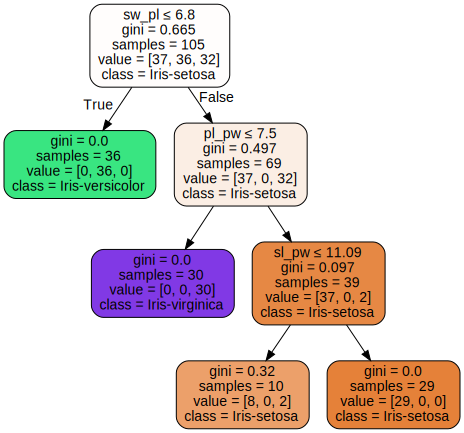

In [181]:
import graphviz

with open('iris_model.dot') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))